In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

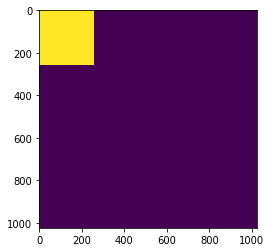

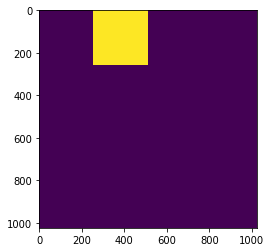

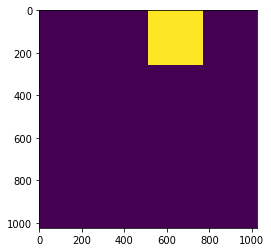

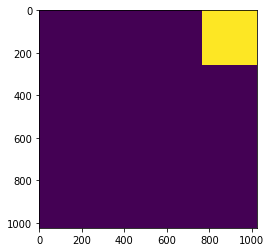

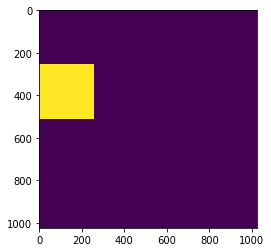

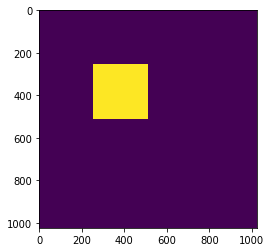

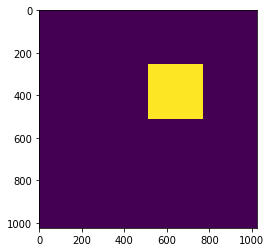

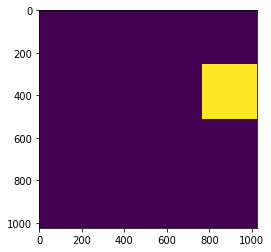

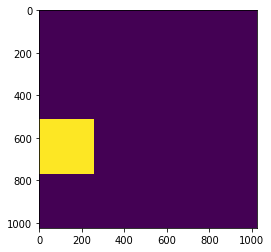

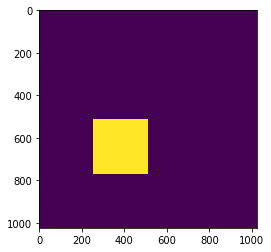

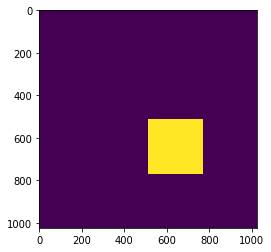

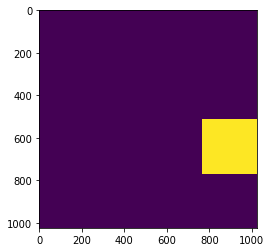

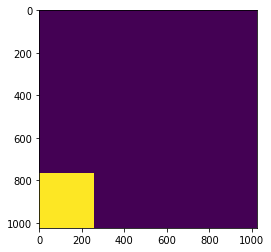

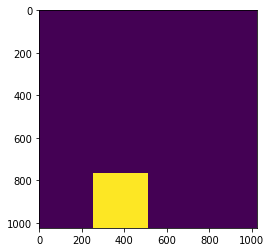

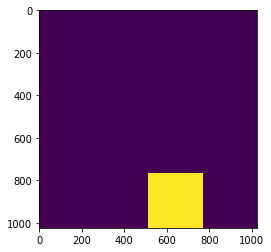

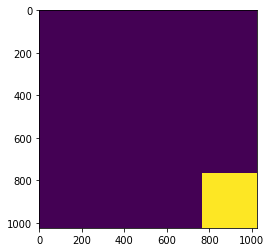

In [8]:
# run tests

%matplotlib inline

img_path='./queries/microsoftlogo.png'
testimg=cv2.imread(img_path)
image = cv2.cvtColor(testimg, cv2.COLOR_BGR2HSV)

def histogram(image, mask):
    # extract a 3D color histogram from the masked region of the
    # image, using the supplied number of bins per channel
    hist = cv2.calcHist([image], [0, 1, 2], mask, bins,
        [0, 180, 0, 256, 0, 256])

    # normalize the histogram if we are using OpenCV 2.4
    if imutils.is_cv2():
        hist = cv2.normalize(hist).flatten()

    # otherwise handle for OpenCV 3+
    else:
        hist = cv2.normalize(hist, hist).flatten()

    # return the histogram
    return hist
# grab the dimensions and compute the center of the image
(h, w) = image.shape[:2]
(cX, cY) = (int(w * 0.5), int(h * 0.5))
(cX0, cY0) = (int(w * 0.25), int(h * 0.25))
(cX1, cY1) = (int(w * 0.5), int(h * 0.5))
(cX2, cY2) = (int(w * 0.75), int(h * 0.75))
#print("h:{},w:{},cx:{},cy:{}".format(str(h),str(w),str(cX),str(cY)))
# divide the image into four rectangles/segments (top-left,
# top-right, bottom-right, bottom-left)
#segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h), (0, cX, cY, h)]
segments = [(0, cX0, 0, cY0), (cX0, cX1, 0, cY0),(cX1, cX2, 0, cY0),(cX2, w, 0, cY0),
            (0, cX0, cY0, cY1), (cX0, cX1, cY0, cY1),(cX1, cX2, cY0, cY1),(cX2, w, cY0, cY1),
            (0, cX0, cY1, cY2), (cX0, cX1, cY1, cY2),(cX1, cX2, cY1, cY2),(cX2, w, cY1, cY2),
            (0, cX0, cY2, h), (cX0, cX1, cY2, h),(cX1, cX2, cY2, h),(cX2, w, cY2, h)]

# construct an elliptical mask representing the center of the
# image
"""
(axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
ellipMask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)
"""

# loop over the segments
for (startX, endX, startY, endY) in segments:
    # construct a mask for each corner of the image, subtracting
    #print("startX:{},endX:{},startY:{},endY:{}".format(str(startX),str(endX),str(startY),str(endY)))
    # the elliptical center from it
    cornerMask = np.zeros(image.shape[:2], dtype = "uint8")
    cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
    plt.imshow(cornerMask)
    plt.show()

In [9]:
import imutils

class ColorDescriptor2:
    def __init__(self, bins):
        # store the number of bins for the 3D histogram
        self.bins = bins

    def describe(self, image):
        # convert the image to the HSV color space and initialize
        # the features used to quantify the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        features = []

        # grab the dimensions and compute the center of the image
        (h, w) = image.shape[:2]
        (cX, cY) = (int(w * 0.5), int(h * 0.5))
        (cX0, cY0) = (int(w * 0.25), int(h * 0.25))
        (cX1, cY1) = (int(w * 0.5), int(h * 0.5))
        (cX2, cY2) = (int(w * 0.75), int(h * 0.75))
        #print("h:{},w:{},cx:{},cy:{}".format(str(h),str(w),str(cX),str(cY)))
        # divide the image into four rectangles/segments (top-left,
        # top-right, bottom-right, bottom-left)
        #segments = [(0, cX, 0, cY), (cX, w, 0, cY), (cX, w, cY, h), (0, cX, cY, h)]
        segments = [(0, cX0, 0, cY0), (cX0, cX1, 0, cY0),(cX1, cX2, 0, cY0),(cX2, w, 0, cY0),
                    (0, cX0, cY0, cY1), (cX0, cX1, cY0, cY1),(cX1, cX2, cY0, cY1),(cX2, w, cY0, cY1),
                    (0, cX0, cY1, cY2), (cX0, cX1, cY1, cY2),(cX1, cX2, cY1, cY2),(cX2, w, cY1, cY2),
                    (0, cX0, cY2, h), (cX0, cX1, cY2, h),(cX1, cX2, cY2, h),(cX2, w, cY2, h)]

        # construct an elliptical mask representing the center of the
        # image
        """
        (axesX, axesY) = (int(w * 0.75) // 2, int(h * 0.75) // 2)
        ellipMask = np.zeros(image.shape[:2], dtype = "uint8")
        cv2.ellipse(ellipMask, (cX, cY), (axesX, axesY), 0, 0, 360, 255, -1)
        """

        # loop over the segments
        for (startX, endX, startY, endY) in segments:
            # construct a mask for each corner of the image, subtracting
            #print("startX:{},endX:{},startY:{},endY:{}".format(str(startX),str(endX),str(startY),str(endY)))
            # the elliptical center from it
            cornerMask = np.zeros(image.shape[:2], dtype = "uint8")
            cv2.rectangle(cornerMask, (startX, startY), (endX, endY), 255, -1)
            #plt.imshow(cornerMask)
            #plt.show()
            # extract a color histogram from the image, then update the
            # feature vector
            hist = self.histogram(image, cornerMask)
            features.extend(hist)

        # extract a color histogram from the elliptical region and
        # update the feature vector
        #hist = self.histogram(image, ellipMask)
        #features.extend(hist)

        # return the feature vector
        return features

    def histogram(self, image, mask):
        # extract a 3D color histogram from the masked region of the
        # image, using the supplied number of bins per channel
        hist = cv2.calcHist([image], [0, 1, 2], mask, self.bins,
            [0, 180, 0, 256, 0, 256])

        # normalize the histogram if we are using OpenCV 2.4
        if imutils.is_cv2():
            hist = cv2.normalize(hist).flatten()

        # otherwise handle for OpenCV 3+
        else:
            hist = cv2.normalize(hist, hist).flatten()

        # return the histogram
        return hist

In [36]:
# import the necessary packages
import glob
import cv2

# initialize the color descriptor
cd = ColorDescriptor2((8, 12, 3))


# open the output index file for writing
output = open('index2.csv', "w")

# use glob to grab the image paths and loop over them
for ext in ('*.gif', '*.png', '*.jpg','*.jpeg'):
    for imagePath in glob.glob('./dataset/' + ext):
        # extract the image ID (i.e. the unique filename) from the image
        # path and load the image itself
        imageID = imagePath[imagePath.rfind("/") + 1:]
        image = cv2.imread(imagePath)

        # describe the image
        features = cd.describe(image)

        # write the features to file
        features = [str(f) for f in features]
        output.write("%s,%s\n" % (imageID, ",".join(features)))
print("finish populating descriptor")
# close the index file
output.close()

finish populating descriptor


In [10]:
# initialize the image descriptor
cd = ColorDescriptor2((8, 12, 3))

# load the query image and describe it
query = cv2.imread('./queries/microsoftlogo.png')

print(query.shape)
features = cd.describe(query)

# perform the search
searcher = Searcher('index2.csv')
results = searcher.search(features)


(1024, 1024, 3)


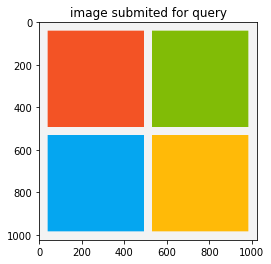

----------------------------------------------------------------------------------------------------
17.9976693147 dataset\0082.jpg


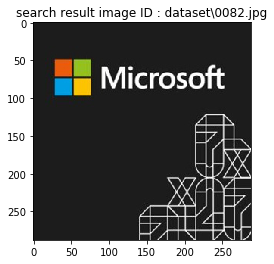

19.2719900302 dataset\0048.jpg


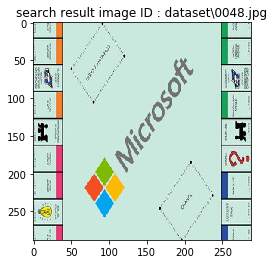

19.3074927676 dataset\0049.jpg


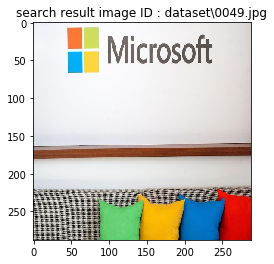

20.2823802549 dataset\101801.png


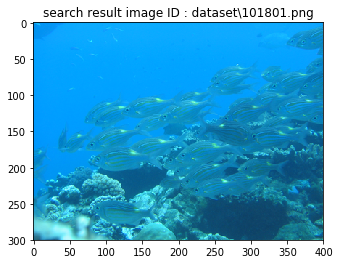

20.6049922677 dataset\127201.png


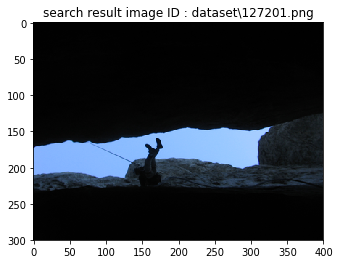

20.720325056 dataset\127200.png


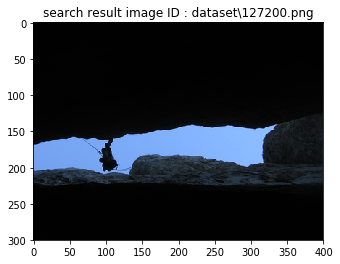

21.0711807246 dataset\108200.png


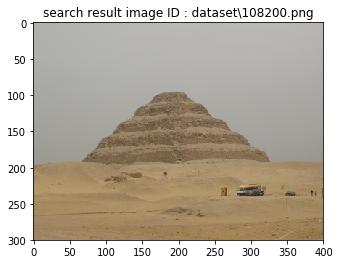

21.1476406175 dataset\0047.jpg


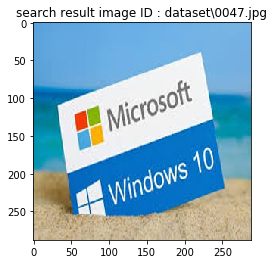

21.5234389202 dataset\124802.png


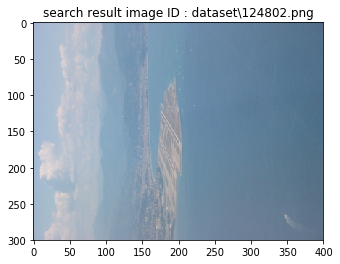

21.7765851522 dataset\0092.jpg


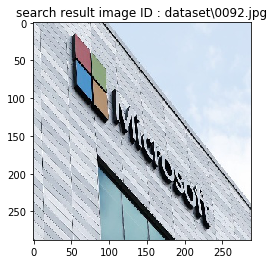

21.8694144116 dataset\108104.png


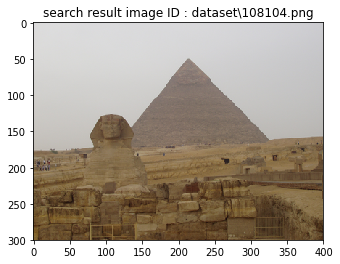

21.8982399618 dataset\127202.png


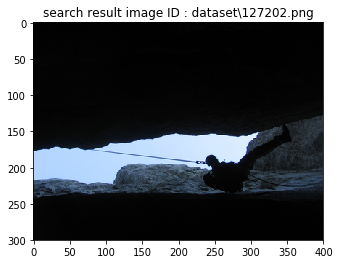

21.9560287695 dataset\124800.png


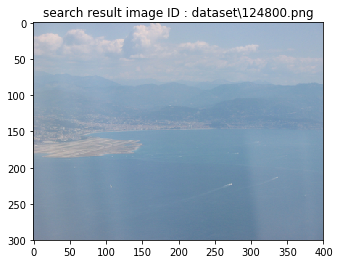

22.0854664289 dataset\108102.png


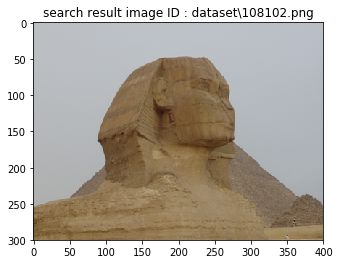

22.1668325458 dataset\106001.png


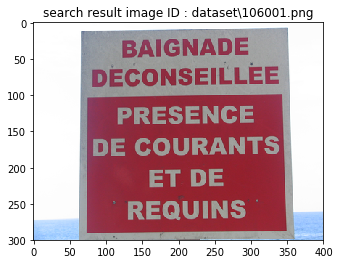

22.1817084347 dataset\108101.png


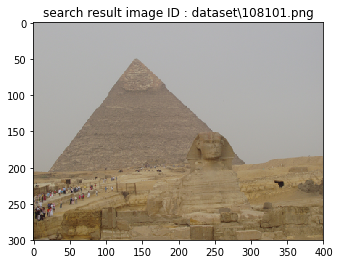

22.2159995791 dataset\108400.png


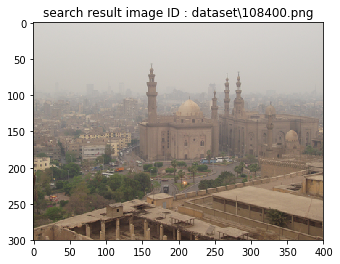

22.311501129 dataset\0079.jpg


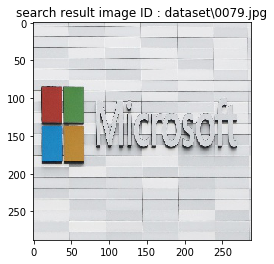

22.3361148808 dataset\0076.jpg


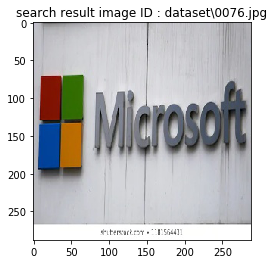

22.579856522 dataset\126200.png


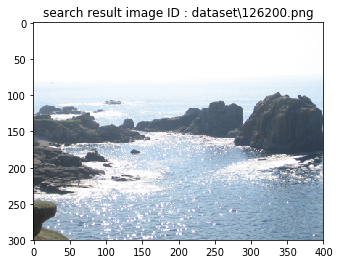

22.6438137251 dataset\104201.png


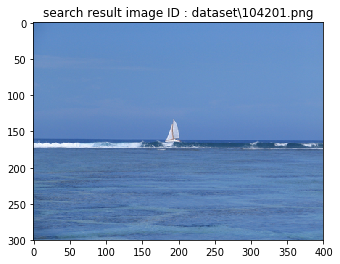

22.7673871873 dataset\108201.png


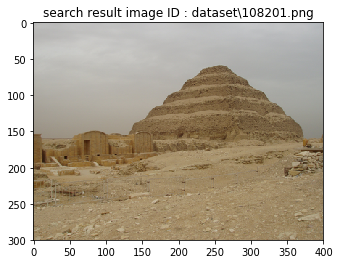

22.8168232721 dataset\124801.png


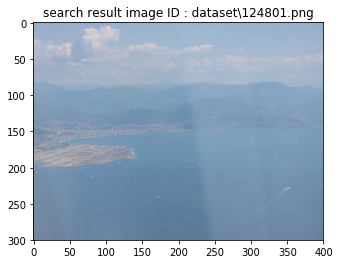

22.9243371416 dataset\0093.jpg


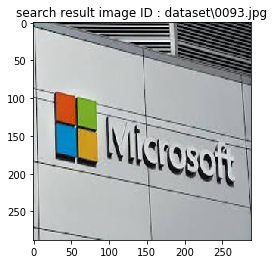

23.2138241761 dataset\0084.jpg


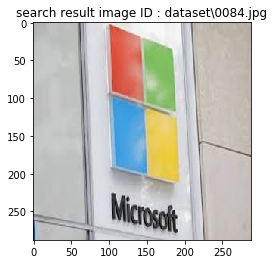

23.258103245 dataset\108103.png


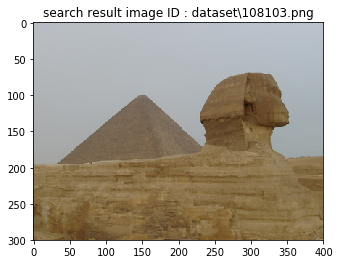

23.4948482105 dataset\107001.png


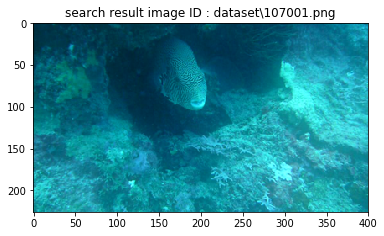

23.5806971469 dataset\108105.png


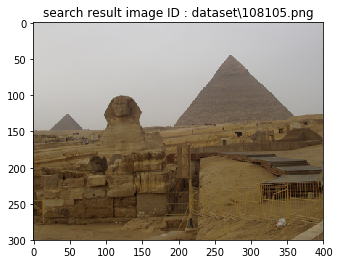

23.6234075161 dataset\126201.png


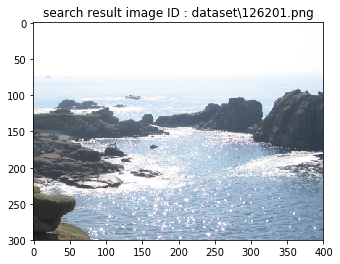

23.6677000062 dataset\117301.png


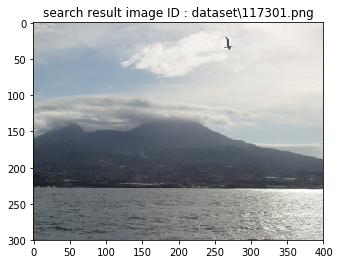

23.6714057379 dataset\0031.jpg


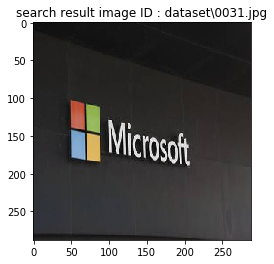

23.7831707658 dataset\108202.png


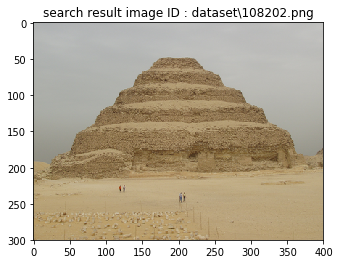

23.9442025869 dataset\108106.png


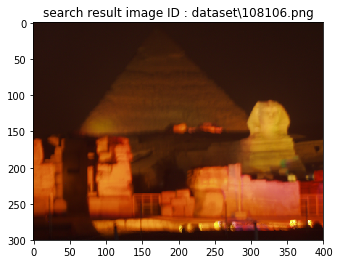

24.0861046824 dataset\0075.jpg


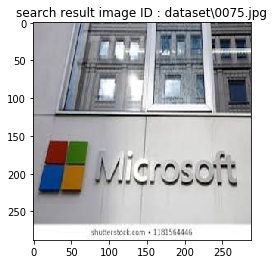

24.1600603437 dataset\115000.png


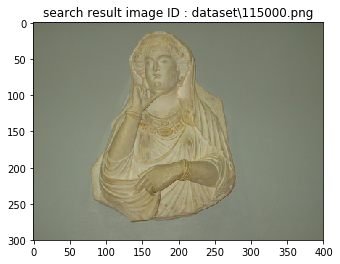

24.2483823962 dataset\107702.png


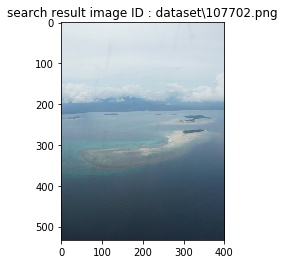

24.2563517546 dataset\104200.png


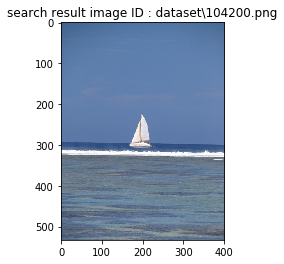

24.2902309257 dataset\106400.png


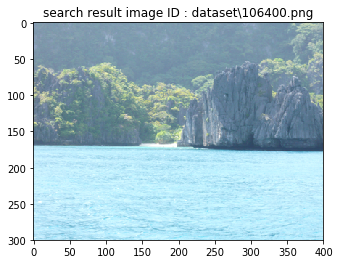

24.3652942412 dataset\108401.png


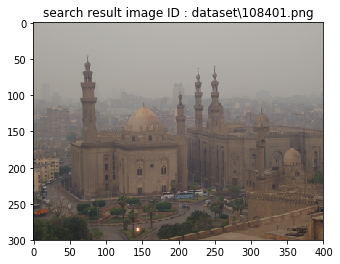

24.3996411742 dataset\124501.png


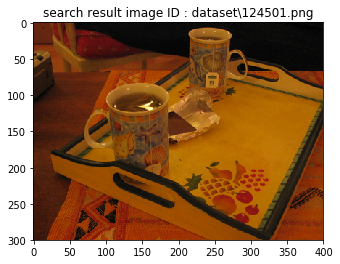

24.4171148805 dataset\119701.png


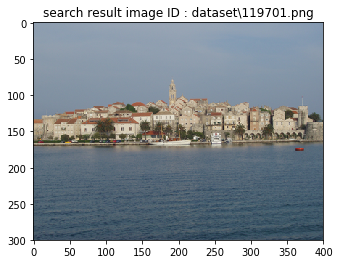

24.4281036879 dataset\0074.jpg


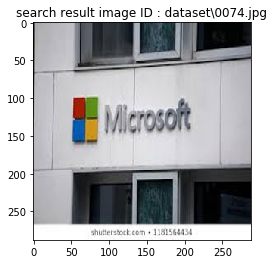

24.4648163335 dataset\118501.png


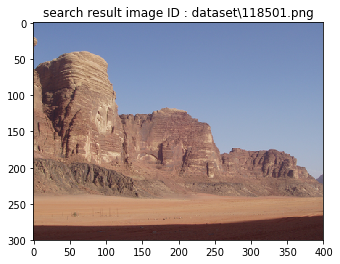

24.4816382434 dataset\106401.png


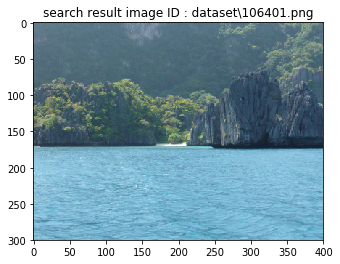

24.5908112727 dataset\126601.png


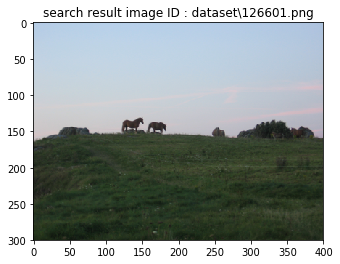

24.6528360335 dataset\118601.png


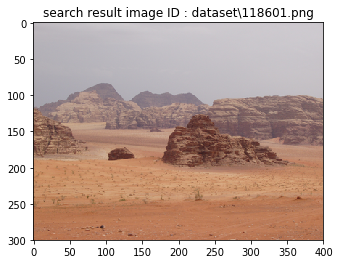

24.6553533166 dataset\107701.png


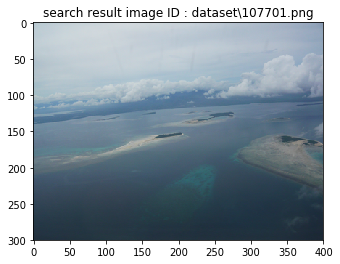

24.686170989 dataset\118500.png


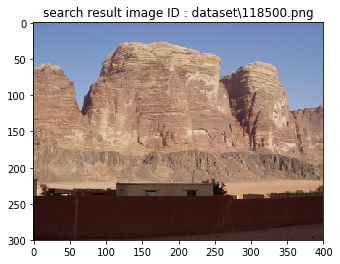

24.7505281221 dataset\101800.png


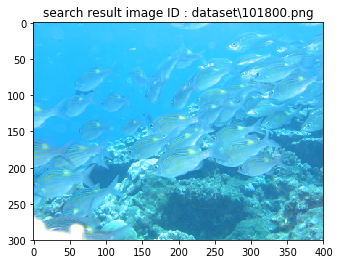

24.8155586098 dataset\126300.png


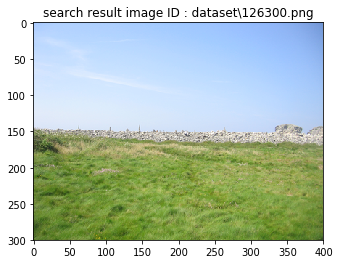

In [11]:
import matplotlib.pyplot as plt
# display the query
plt.imshow(query[:,:,[2,1,0]])
plt.title("image submited for query")
plt.show()
print("----"*25)
resultimgs=[]
# loop over the results
for (score, resultID) in results:
    # load the result image and display it
    print(score,resultID)
    #result = cv2.imread(args["result_path"] + "/" + resultID)
    result=plt.imread(resultID.replace('\\','/'))
    resultimgs.append(result)
    plt.imshow(result)
    
    plt.title("search result image ID : "+resultID)
    plt.show()

In [56]:
def sift_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of SIFT matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image_template, cv2.COLOR_BGR2GRAY)
    
    # Create SIFT detector object
    #sift = cv2.SIFT()
    sift=cv2.xfeatures2d.SIFT_create()
    print(type(sift))

    # Obtain the keypoints and descriptors using SIFT
    #Here keypoints_1 will be a list of keypoints and 
    #descriptors_1 is a numpy array of shape num_of_Keypoints×128
    keypoints_1, descriptors_1 = sift.detectAndCompute(image1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image2, None)

    # Define parameters for our Flann Matcher
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 3)
    search_params = dict(checks = 100)

    # Create the Flann Matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Obtain matches using K-Nearest Neighbor Method
    # the result 'matchs' is the number of similar matches found in both images
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)

    # Store good matches using Lowe's ratio test
    good_matches = []
    for m,n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m) 

    return len(good_matches)

def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image_template, cv2.COLOR_BGR2GRAY)
    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)

    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher 
    # Note we're no longer using Flannbased matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)

    return len(matches)

<class 'cv2.xfeatures2d_SIFT'>
29


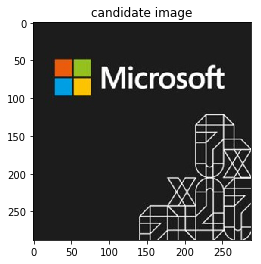

<class 'cv2.xfeatures2d_SIFT'>
5
<class 'cv2.xfeatures2d_SIFT'>
5
<class 'cv2.xfeatures2d_SIFT'>
6
<class 'cv2.xfeatures2d_SIFT'>
7


In [57]:
threshold=10
for candidate in resultimgs:
    if candidate.shape==(288,288,3):
        matches_shift=sift_detector(candidate,query)
        matches_orb=ORB_detector(candidate,query)
        matches=max(matches_shift,matches_orb)
        print(matches)
        if matches > threshold:
            plt.imshow(candidate)
            plt.title("candidate image")
            plt.show()